<a href="https://colab.research.google.com/github/jdelvalle74/haciendo_ciencia_proyecto_final/blob/main/ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Cargar el dataset
import pandas as pd

tesla_data_df = pd.read_csv('TSLA.csv')

In [5]:
# Mostrar n registros
reg = 10
tesla_data_df.head(reg)

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-Jun-10,1.27,1.67,1.17,1.59,1.59,281494500.0
1,30-Jun-10,1.72,2.03,1.55,1.59,1.59,257806500.0
2,1-Jul-10,1.67,1.73,1.35,1.46,1.46,123282000.0
3,2-Jul-10,1.53,1.54,1.25,1.28,1.28,77097000.0
4,6-Jul-10,1.33,1.33,1.06,1.07,1.07,103003500.0
5,7-Jul-10,1.09,1.11,1.00,1.05,1.05,103825500.0
6,8-Jul-10,1.08,1.17,1.04,1.16,1.16,115671000.0
7,9-Jul-10,1.17,1.19,1.10,1.16,1.16,60759000.0
8,12-Jul-10,1.2,1.20,1.13,1.14,1.14,33037500.0
9,13-Jul-10,1.16,1.24,1.13,1.21,1.21,40201500.0


In [6]:
# Shape del Dataset
tesla_data_df.shape

(3734, 7)

In [7]:
# Info del Dataset
tesla_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3734 entries, 0 to 3733
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3734 non-null   object 
 1   Open       3734 non-null   object 
 2   High       3732 non-null   float64
 3   Low        3732 non-null   float64
 4   Close      3732 non-null   float64
 5   Adj Close  3732 non-null   float64
 6   Volume     3732 non-null   float64
dtypes: float64(5), object(2)
memory usage: 204.3+ KB


In [8]:
# Buscando Nulos
tesla_data_df.isnull().sum().to_frame("Cantidad de nulos")

,Cantidad de nulos
Date,0
Open,0
High,2
Low,2
Close,2
Adj Close,2
Volume,2


In [9]:
# Valores faltantes: Decidir si eliminar filas o imputar valores.
tesla_data_df.dropna(inplace=True)
tesla_data_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-Jun-10,1.27,1.67,1.17,1.59,1.59,281494500.0
1,30-Jun-10,1.72,2.03,1.55,1.59,1.59,257806500.0
2,1-Jul-10,1.67,1.73,1.35,1.46,1.46,123282000.0
3,2-Jul-10,1.53,1.54,1.25,1.28,1.28,77097000.0
4,6-Jul-10,1.33,1.33,1.06,1.07,1.07,103003500.0


In [10]:
# Buscando Nulos
tesla_data_df.isnull().sum().to_frame("Cantidad de nulos")

,Cantidad de nulos
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [11]:
# Shape del Dataset
tesla_data_df.shape

(3732, 7)

In [12]:
# Buscando dupicados
print("Número de duplicados:", tesla_data_df.duplicated().sum())
#tesla_data_df.drop_duplicates(inplace=True)

Número de duplicados: 0


In [13]:
# Info del Dataset
tesla_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3732 entries, 0 to 3733
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3732 non-null   object 
 1   Open       3732 non-null   object 
 2   High       3732 non-null   float64
 3   Low        3732 non-null   float64
 4   Close      3732 non-null   float64
 5   Adj Close  3732 non-null   float64
 6   Volume     3732 non-null   float64
dtypes: float64(5), object(2)
memory usage: 362.3+ KB


In [14]:
# Convertir la columna 'Date' a datetime
tesla_data_df['Date'] = pd.to_datetime(tesla_data_df['Date'])

<ipython-input-14-30744f763858>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tesla_data_df['Date'] = pd.to_datetime(tesla_data_df['Date'])


In [15]:
tesla_data_df['Year'] = tesla_data_df['Date'].dt.year
tesla_data_df['Month'] = tesla_data_df['Date'].dt.month

In [16]:
tesla_data_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
0,2010-06-29,1.27,1.67,1.17,1.59,1.59,281494500.0,2010,6
1,2010-06-30,1.72,2.03,1.55,1.59,1.59,257806500.0,2010,6
2,2010-07-01,1.67,1.73,1.35,1.46,1.46,123282000.0,2010,7
3,2010-07-02,1.53,1.54,1.25,1.28,1.28,77097000.0,2010,7
4,2010-07-06,1.33,1.33,1.06,1.07,1.07,103003500.0,2010,7


In [17]:
tesla_data_df['Volume'].head()

,Volume
0,281494500.0
1,257806500.0
2,123282000.0
3,77097000.0
4,103003500.0


In [18]:
# Agrupar por año y mes, y calcular la suma del volumen
volumen_por_año_mes = tesla_data_df.groupby(['Year', 'Month'])['Volume'].sum()

# Mostrar el resultado
volumen_por_año_mes.head(100)

Year  Month
2010  6        5.393010e+08
      7        9.686370e+08
      8        2.255730e+08
      9        2.706885e+08
      10       9.821700e+07
                   ...     
2018  5        2.333672e+09
      6        3.201376e+09
      7        2.584923e+09
      8        4.160403e+09
      9        2.941131e+09
Name: Volume, Length: 100, dtype: float64

In [19]:
volumen_por_año_mes.info()

<class 'pandas.core.series.Series'>
MultiIndex: 179 entries, (np.int32(2010), np.int32(6)) to (np.int32(2025), np.int32(4))
Series name: Volume
Non-Null Count  Dtype  
--------------  -----  
179 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB


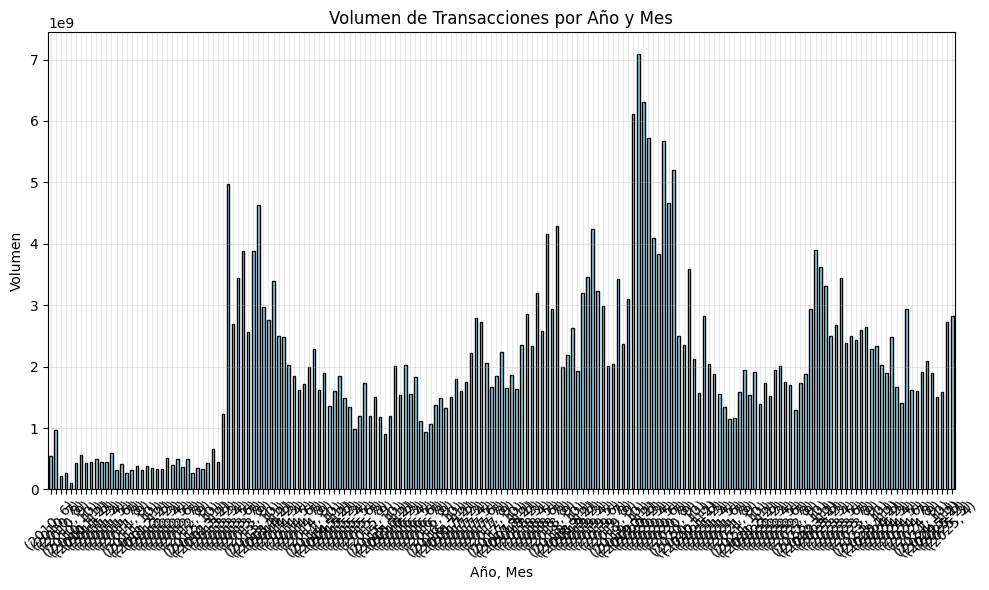

In [20]:
import matplotlib.pyplot as plt

# Graficar el volumen usando pandas.Series.plot
volumen_por_año_mes.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Volumen de Transacciones por Año y Mes')
plt.xlabel('Año, Mes')
plt.ylabel('Volumen')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar que se corten las etiquetas
plt.show()

In [21]:
# Encontrar el índice del valor máximo
indice_maximo = volumen_por_año_mes.idxmax()

# Obtener el año, mes y volumen del índice máximo
año_maximo, mes_maximo = indice_maximo
volumen_maximo = volumen_por_año_mes.loc[indice_maximo]

# Imprimir el resultado
print(f"Año de mayor volumen: {año_maximo}")
print(f"Mes de mayor volumen: {mes_maximo}")
print(f"Volumen máximo: {volumen_maximo}")


Año de mayor volumen: 2020
Mes de mayor volumen: 2
Volumen máximo: 7088802000.0


In [22]:
volumen_por_año_mes.max()

7088802000.0

In [23]:
# Encontrar el índice del valor mínimo
indice_minimo = volumen_por_año_mes.idxmin()

# Obtener el año, mes y volumen del índice máximo
año_minimo, mes_minimo = indice_minimo
volumen_minimo = volumen_por_año_mes.loc[indice_minimo]

# Imprimir el resultado
print(f"Año de menor volumen: {año_minimo}")
print(f"Mes de menor volumen: {mes_minimo}")
print(f"Volumen mínimmo: {volumen_minimo}")


Año de menor volumen: 2010
Mes de menor volumen: 10
Volumen mínimmo: 98217000.0


In [24]:
# Agrupar por año y mes, y calcular la suma del volumen
volumen_por_año = tesla_data_df.groupby(['Year'])['Volume'].sum()

# Mostrar el resultado
volumen_por_año.head(100)

,Volume
Year,
2010,3.080536e+09
2011,4.878526e+09
2012,4.611735e+09
2013,3.178119e+10
2014,2.613482e+10
2015,1.632327e+10
2016,1.743543e+10
2017,2.385047e+10
2018,3.242458e+10


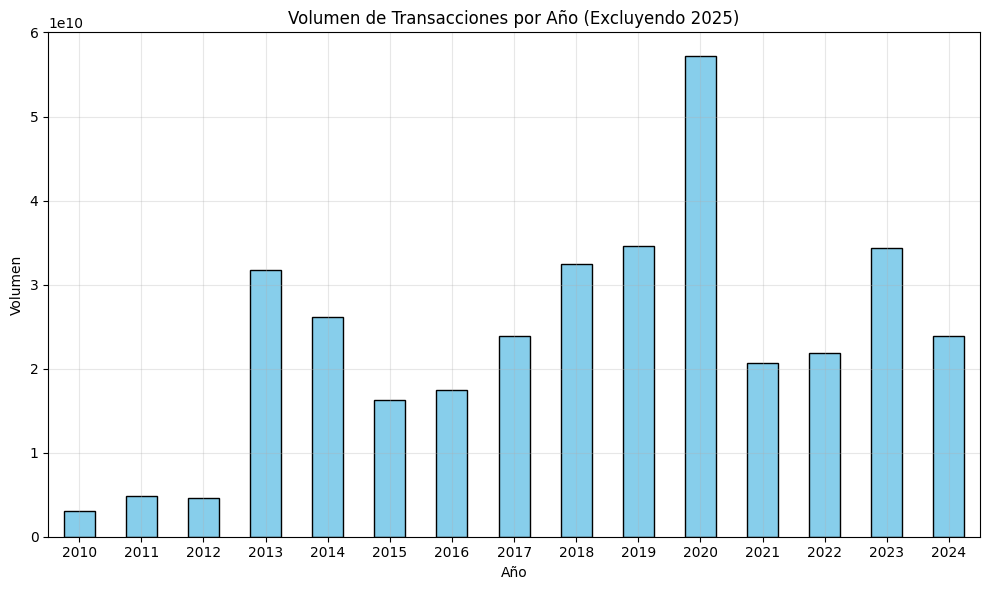

In [25]:
import matplotlib.pyplot as plt

# Filtrar la Serie para excluir el año 2025
volumen_por_año_filtrado = volumen_por_año[volumen_por_año.index != 2025]

# Graficar el volumen usando pandas.Series.plot
volumen_por_año_filtrado.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Volumen de Transacciones por Año (Excluyendo 2025)')
plt.xlabel('Año')
plt.ylabel('Volumen')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar que se corten las etiquetas
plt.show()

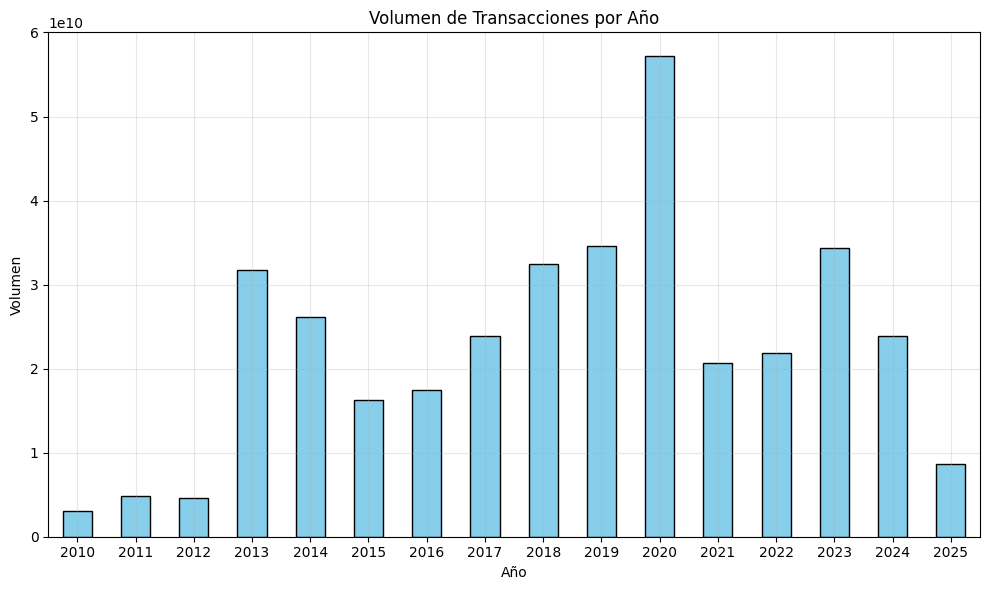

In [26]:
import matplotlib.pyplot as plt


# Graficar el volumen usando pandas.Series.plot
volumen_por_año.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Volumen de Transacciones por Año')
plt.xlabel('Año')
plt.ylabel('Volumen')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar que se corten las etiquetas
plt.show()

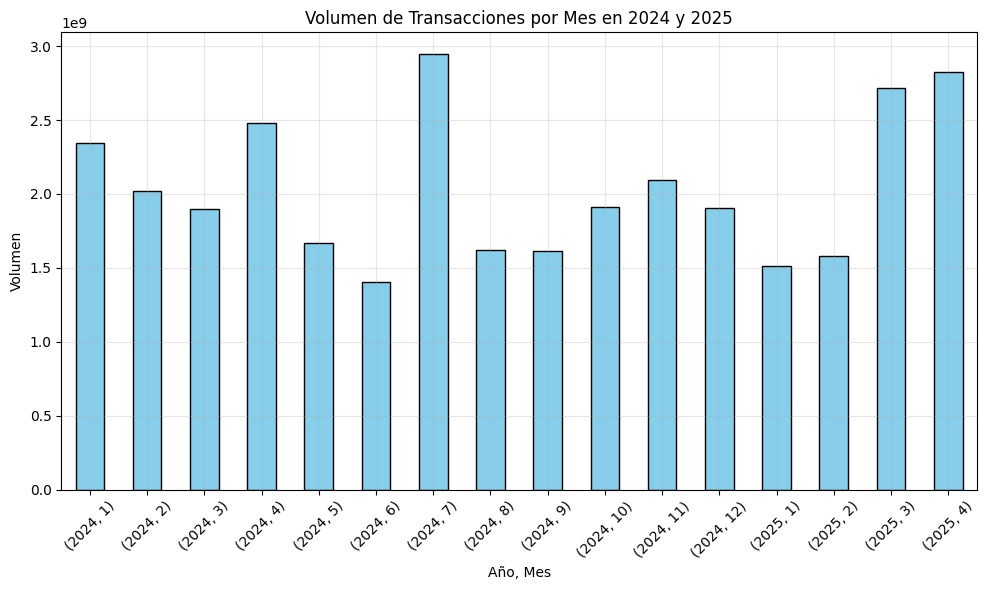

In [27]:
import matplotlib.pyplot as plt

# Filtrar la Serie para los años 2024 y 2025
volumen_2024_2025 = volumen_por_año_mes[volumen_por_año_mes.index.get_level_values('Year').isin([2024, 2025])]

# Graficar el volumen por mes de los años 2024 y 2025
volumen_2024_2025.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Volumen de Transacciones por Mes en 2024 y 2025')
plt.xlabel('Año, Mes')
plt.ylabel('Volumen')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar que se corten las etiquetas
plt.show()

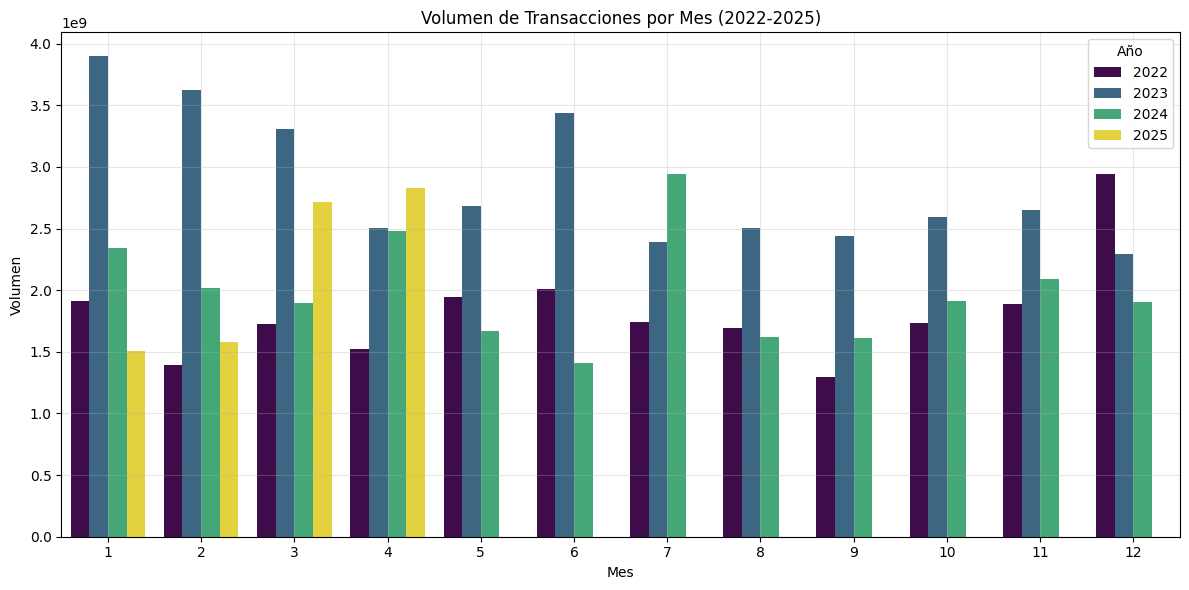

In [28]:
import seaborn as sns

# Filtrar la Serie para los años 2022 a 2025
volumen_2022_2025 = volumen_por_año_mes[volumen_por_año_mes.index.get_level_values('Year').isin(range(2022, 2026))]

# Convertir el MultiIndex a columnas para usar con seaborn
volumen_2022_2025_df = volumen_2022_2025.reset_index()

# Graficar el volumen por mes con hue para el año
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Volume', hue='Year', data=volumen_2022_2025_df, palette='viridis')
plt.title('Volumen de Transacciones por Mes (2022-2025)')
plt.xlabel('Mes')
plt.ylabel('Volumen')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='Año')
plt.show()

Text(0.5, 0, 'Precio')

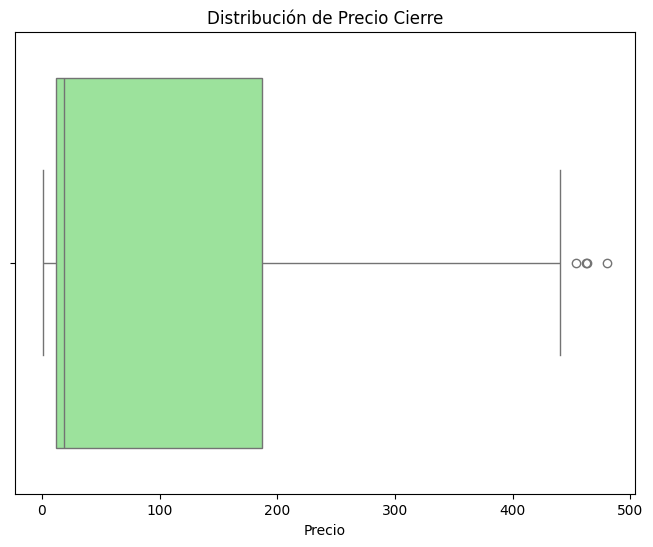

In [29]:
# Boxplot de precio
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adj Close', data=tesla_data_df, color='lightgreen')
plt.title('Distribución de Precio Cierre')
plt.xlabel('Precio')
#plt.savefig('duration_boxplot.png')


In [30]:
tesla_data_df[tesla_data_df['Adj Close']>200]

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
2630,2020-12-07,201.64,216.26,201.02,213.92,213.92,168929100.0,2020,12
2631,2020-12-08,208.5,217.09,206.17,216.63,216.63,192795000.0,2020,12
2632,2020-12-09,217.9,218.11,196.00,201.49,201.49,213873600.0,2020,12
2633,2020-12-10,191.46,209.25,188.78,209.02,209.02,201249600.0,2020,12
2634,2020-12-11,205,208.00,198.93,203.33,203.33,139425000.0,2020,12
...,...,...,...,...,...,...,...,...,...
3729,2025-04-23,254.86,259.45,244.43,250.74,250.74,150381900.0,2025,4
3730,2025-04-24,250.5,259.54,249.20,259.51,259.51,94464200.0,2025,4
3731,2025-04-25,261.69,286.85,259.63,284.95,284.95,167560700.0,2025,4
3732,2025-04-28,288.98,294.86,272.42,285.88,285.88,151731800.0,2025,4


In [31]:
tesla_data_df['Adj Close'].max()

479.86

In [32]:
tesla_data_df[tesla_data_df['Adj Close']>280].count()

,0
Date,270
Open,270
High,270
Low,270
Close,270
Adj Close,270
Volume,270
Year,270
Month,270


In [33]:
# Calcular la variación diaria del precio de cierre ajustado
tesla_data_df['Variacion_Diaria'] = tesla_data_df['Adj Close'].pct_change()

# Mostrar las primeras filas del DataFrame con la nueva columna
print(tesla_data_df[['Date', 'Adj Close', 'Variacion_Diaria']].head())

        Date  Adj Close  Variacion_Diaria
0 2010-06-29       1.59               NaN
1 2010-06-30       1.59          0.000000
2 2010-07-01       1.46         -0.081761
3 2010-07-02       1.28         -0.123288
4 2010-07-06       1.07         -0.164062


In [34]:
tesla_data_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Variacion_Diaria
3729,2025-04-23,254.86,259.45,244.43,250.74,250.74,150381900.0,2025,4,0.053662
3730,2025-04-24,250.5,259.54,249.20,259.51,259.51,94464200.0,2025,4,0.034976
3731,2025-04-25,261.69,286.85,259.63,284.95,284.95,167560700.0,2025,4,0.098031
3732,2025-04-28,288.98,294.86,272.42,285.88,285.88,151731800.0,2025,4,0.003264
3733,2025-04-29,285.5,293.32,279.47,292.03,292.03,108331700.0,2025,4,0.021513


In [35]:
# Ordenar el DataFrame por fecha de mayor a menor
tesla_data_df.sort_values(by='Date', ascending=False, inplace=True)

# Mostrar las últimas filas del DataFrame para verificar el orden
tesla_data_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Variacion_Diaria
3733,2025-04-29,285.5,293.32,279.47,292.03,292.03,108331700.0,2025,4,0.021513
3732,2025-04-28,288.98,294.86,272.42,285.88,285.88,151731800.0,2025,4,0.003264
3731,2025-04-25,261.69,286.85,259.63,284.95,284.95,167560700.0,2025,4,0.098031
3730,2025-04-24,250.5,259.54,249.20,259.51,259.51,94464200.0,2025,4,0.034976
3729,2025-04-23,254.86,259.45,244.43,250.74,250.74,150381900.0,2025,4,0.053662


In [36]:
tesla_data_df['Variacion_Diaria'].std()

0.03660389312199191

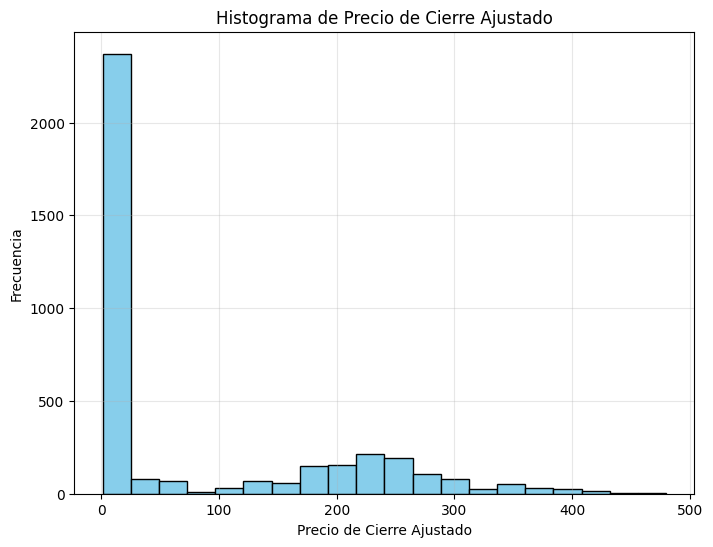

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura si es necesario
plt.hist(tesla_data_df['Adj Close'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Precio de Cierre Ajustado')
plt.xlabel('Precio de Cierre Ajustado')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

In [38]:
# Contar valores ceros en "Adj Close"
num_ceros = (tesla_data_df['Adj Close'] == 0).sum()

# Imprimir el resultado
print(f"Número de valores ceros en 'Adj Close': {num_ceros}")

Número de valores ceros en 'Adj Close': 0


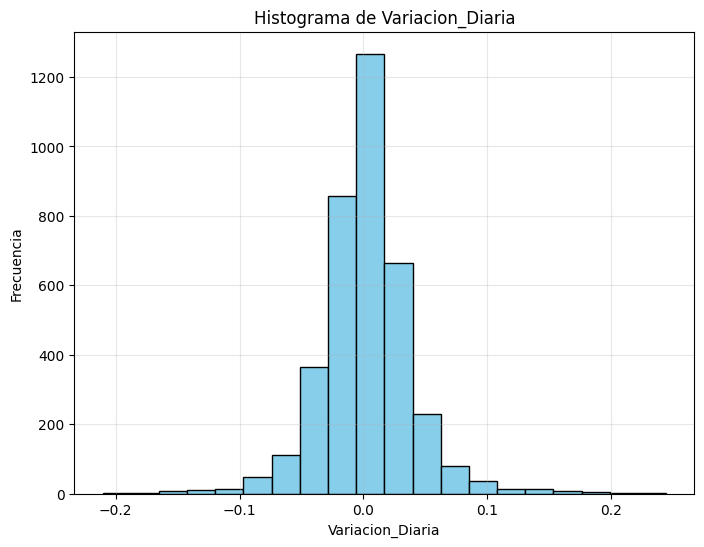

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura si es necesario
plt.hist(tesla_data_df['Variacion_Diaria'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Variacion_Diaria')
plt.xlabel('Variacion_Diaria')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()